<a id="0"></a> <br>

> ## Introduction
- Currently, being able to predict that something might be popular beforehand is an important research subject for every industry. It also has recently became a very important subject for the growing and competitive music industry as well. Since wide use of digital music platforms (Spotify, Billboard, Lastfm), data can be easily reached and the listening behaviors of the listeners can be easily observed. This provides convenience in forecasting techniques and it is also frequently used in recommendation systems.

<a id="2"></a> 
## Import Libraries

In [76]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
# Any results you write to the current directory are saved as output.
import warnings
warnings.filterwarnings("ignore")

 <a id="3"></a> 
 ## Data Preparation and Analysis

In [77]:
#load the data
spotify_song_data= pd.read_csv("song_data.csv")
spotify_song_info= pd.read_csv("song_info.csv") 

In [78]:
song_info=spotify_song_info.copy()

In [79]:
song_data=spotify_song_data.copy()
song_data.head(3)

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.00552,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.01030,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.00817,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324


In [80]:
song_data.shape

(18835, 15)

In [207]:
song_info.shape

(18835, 4)

In [209]:
song_info.head()

,song_name,artist_name,album_names,playlist
0,Boulevard of Broken Dreams,Green Day,Greatest Hits: God's Favorite Band,00s Rock Anthems
1,In The End,Linkin Park,Hybrid Theory,00s Rock Anthems
2,Seven Nation Army,The White Stripes,Elephant,00s Rock Anthems
3,By The Way,Red Hot Chili Peppers,By The Way (Deluxe Version),00s Rock Anthems
4,How You Remind Me,Nickelback,Silver Side Up,00s Rock Anthems


In [210]:
song_inf.info

<bound method DataFrame.info of                         song_name            artist_name  \
0      Boulevard of Broken Dreams              Green Day   
1                      In The End            Linkin Park   
2               Seven Nation Army      The White Stripes   
3                      By The Way  Red Hot Chili Peppers   
4               How You Remind Me             Nickelback   
...                           ...                    ...   
18830              Let It Breathe            Water Liars   
18831                     Answers        Brooke Annibale   
18832      Sudden Love (Acoustic)          The Woodlands   
18833           Gentle on My Mind           Robert Ellis   
18834                    Up to Me           Sera Cahoone   

                              album_names                   playlist  
0      Greatest Hits: God's Favorite Band           00s Rock Anthems  
1                           Hybrid Theory           00s Rock Anthems  
2                                E

In [205]:
song_data.head()

,song_duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,audio_valence,...,key_9,key_10,key_11,audio_mode_0.0,audio_mode_1.0,time_signature_0.0,time_signature_1.0,time_signature_3.0,time_signature_4.0,time_signature_5.0
0,262333.0,0.005520,0.496,0.682,0.000029,0.0589,-4.095,0.0294,167.060,0.474,...,0,0,0,0,1,0,0,0,1,0
1,216933.0,0.010300,0.542,0.853,0.000000,0.1080,-6.407,0.0498,105.256,0.370,...,0,0,0,1,0,0,0,0,1,0
2,231733.0,0.008170,0.737,0.463,0.447000,0.2550,-7.828,0.0792,123.881,0.324,...,0,0,0,0,1,0,0,0,1,0
3,216933.0,0.026400,0.451,0.970,0.003550,0.1020,-4.938,0.1070,122.444,0.198,...,0,0,0,0,1,0,0,0,1,0
4,223826.0,0.000954,0.447,0.766,0.000000,0.1130,-5.065,0.0313,172.011,0.574,...,0,1,0,0,1,0,0,0,1,0


In [206]:
song_data.info

<bound method DataFrame.info of        song_duration_ms  acousticness  danceability  energy  instrumentalness  \
0              262333.0      0.005520         0.496   0.682          0.000029   
1              216933.0      0.010300         0.542   0.853          0.000000   
2              231733.0      0.008170         0.737   0.463          0.447000   
3              216933.0      0.026400         0.451   0.970          0.003550   
4              223826.0      0.000954         0.447   0.766          0.000000   
...                 ...           ...           ...     ...               ...   
18505          159645.0      0.893000         0.500   0.151          0.000065   
18506          205666.0      0.765000         0.495   0.161          0.000001   
18507          182211.0      0.847000         0.719   0.325          0.000000   
18508          352280.0      0.945000         0.488   0.326          0.015700   
18509          193533.0      0.911000         0.640   0.381          0.000254

 <a id="3a"></a> 
## Cleaning Data

In [81]:
song_data.columns[song_data.isnull().any()]

Index([], dtype='object')

In [82]:
song_data.isnull().sum()

song_name           0
song_popularity     0
song_duration_ms    0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
audio_mode          0
speechiness         0
tempo               0
time_signature      0
audio_valence       0
dtype: int64

 <a id="3b"></a> 
## Analysis

In [83]:
song_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  int64  
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  int64  
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  int64  
 14  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.2+ MB


In [84]:
song_data.song_duration_ms= song_data.song_duration_ms.astype(float)
song_data.time_signature= song_data.time_signature.astype(float)
song_data.audio_mode= song_data.audio_mode.astype(float)

In [14]:
song_data.describe()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,18835.000000,1.883500e+04,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000
mean,52.991877,2.182116e+05,0.258539,0.633348,0.644995,0.078008,5.289196,0.179650,-7.447435,0.628139,0.102099,121.073154,3.959119,0.527967
std,21.905654,5.988754e+04,0.288719,0.156723,0.214101,0.221591,3.614595,0.143984,3.827831,0.483314,0.104378,28.714456,0.298533,0.244632
min,0.000000,1.200000e+04,0.000001,0.000000,0.001070,0.000000,0.000000,0.010900,-38.768000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,1.843395e+05,0.024100,0.533000,0.510000,0.000000,2.000000,0.092900,-9.044000,0.000000,0.037800,98.368000,4.000000,0.335000
50%,56.000000,2.113060e+05,0.132000,0.645000,0.674000,0.000011,5.000000,0.122000,-6.555000,1.000000,0.055500,120.013000,4.000000,0.527000
75%,69.000000,2.428440e+05,0.424000,0.748000,0.815000,0.002570,8.000000,0.221000,-4.908000,1.000000,0.119000,139.931000,4.000000,0.725000
max,100.000000,1.799346e+06,0.996000,0.987000,0.999000,0.997000,11.000000,0.986000,1.585000,1.000000,0.941000,242.318000,5.000000,0.984000


In [85]:
song_data["popularity"]= [ 1 if i>=66.5 else 0 for i in song_data.song_popularity ]
song_data["popularity"].value_counts()

0    13386
1     5449
Name: popularity, dtype: int64

- Checked popularity rating of songs that have been popular in the last 10 years in Spotify and took the mean value of them (66.5) . According to this value, the songs has above this rating could remain on the top lists for a long time. If song_popularity is higher than 66.5 (this is about 30% percent of data) we labeled it "1" and if is not we labeled it "0". So we have "1" for the popular songs and "0" for the unpopular ones.

In [86]:
#popular songs' data
a=song_data[song_data["popularity"]==1]
a.describe()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,popularity
count,5449.000000,5449.000000,5449.000000,5449.000000,5449.000000,5449.000000,5449.00000,5449.000000,5449.000000,5449.000000,5449.000000,5449.000000,5449.000000,5449.000000,5449.0
mean,76.992292,218539.555515,0.210354,0.659758,0.658601,0.022390,5.11782,0.174400,-6.624852,0.618829,0.106247,120.753878,3.974307,0.520436,1.0
std,8.068717,48620.048311,0.246079,0.147652,0.187495,0.115572,3.65752,0.137557,3.139341,0.485719,0.102181,27.737971,0.255771,0.230911,0.0
min,67.000000,67000.000000,0.000009,0.072200,0.002890,0.000000,0.00000,0.021500,-34.255000,0.000000,0.022400,57.178000,1.000000,0.035200,1.0
25%,71.000000,190185.000000,0.026300,0.562000,0.541000,0.000000,1.00000,0.092000,-7.906000,0.000000,0.039100,98.883000,4.000000,0.336000,1.0
50%,75.000000,212429.000000,0.106000,0.668000,0.680000,0.000000,5.00000,0.121000,-5.985000,1.000000,0.059100,119.886000,4.000000,0.511000,1.0
75%,82.000000,240533.000000,0.300000,0.765000,0.802000,0.000118,8.00000,0.203000,-4.626000,1.000000,0.131000,139.910000,4.000000,0.701000,1.0
max,100.000000,547733.000000,0.996000,0.978000,0.997000,0.968000,11.00000,0.978000,-0.739000,1.000000,0.733000,212.058000,5.000000,0.980000,1.0


# corelation

In [87]:
song_data.corr()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,popularity
song_popularity,1.000000,-0.018899,-0.065181,0.104290,0.001365,-0.130907,-0.013160,-0.038937,0.099442,-0.004969,0.021479,-0.022672,0.034983,-0.052895,0.699048
song_duration_ms,-0.018899,1.000000,-0.097882,-0.104985,0.092688,-0.015188,-0.004615,0.016086,0.016469,-0.026328,-0.083447,0.012791,0.000264,-0.063421,0.003494
acousticness,-0.065181,-0.097882,1.000000,-0.182500,-0.662639,0.173098,-0.002025,-0.082537,-0.557744,0.064100,-0.093574,-0.136421,-0.157177,-0.121670,-0.106483
danceability,0.104290,-0.104985,-0.182500,1.000000,0.044373,-0.130483,0.007723,-0.090694,0.177639,-0.106539,0.213728,-0.121286,0.136391,0.332014,0.107519
energy,0.001365,0.092688,-0.662639,0.044373,1.000000,-0.205914,0.020416,0.167143,0.755516,-0.051605,0.062053,0.162448,0.146265,0.316742,0.040548
instrumentalness,-0.130907,-0.015188,0.173098,-0.130483,-0.205914,1.000000,-0.009463,-0.032887,-0.390248,-0.014983,-0.081138,-0.036934,-0.069181,-0.178570,-0.160144
key,-0.013160,-0.004615,-0.002025,0.007723,0.020416,-0.009463,1.000000,-0.008193,0.010452,-0.169848,0.033639,0.003239,-0.008282,0.025356,-0.030251
liveness,-0.038937,0.016086,-0.082537,-0.090694,0.167143,-0.032887,-0.008193,1.000000,0.102450,-0.001035,0.090845,0.031876,0.013289,0.013789,-0.023265
loudness,0.099442,0.016469,-0.557744,0.177639,0.755516,-0.390248,0.010452,0.102450,1.000000,-0.058506,0.078164,0.129938,0.119241,0.199696,0.137111
audio_mode,-0.004969,-0.026328,0.064100,-0.106539,-0.051605,-0.014983,-0.169848,-0.001035,-0.058506,1.000000,-0.111627,0.020448,-0.024042,-0.004558,-0.012290


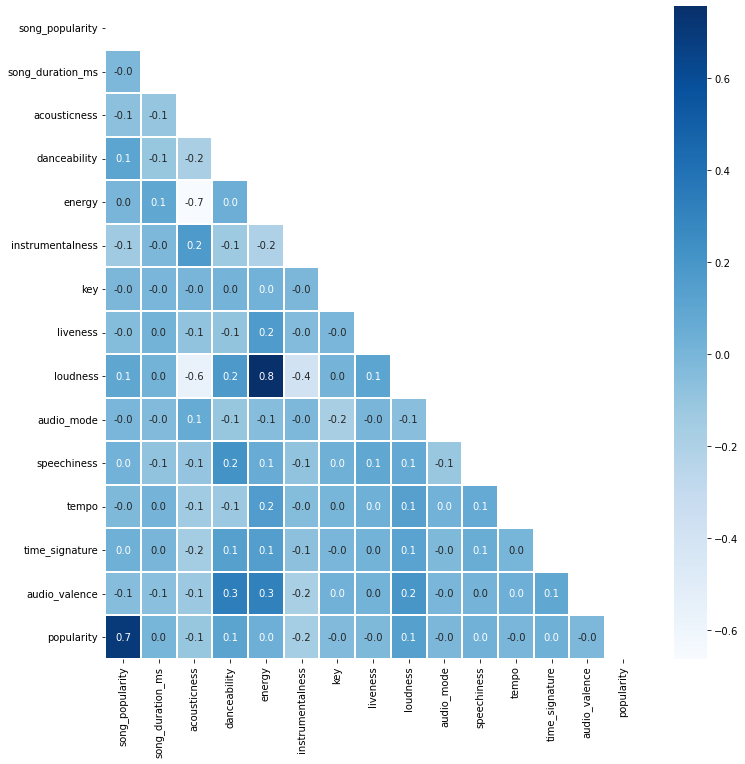

In [88]:
f,ax = plt.subplots(figsize=(12, 12))
mask = np.zeros_like(song_data.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(song_data.corr(), annot=True, linewidths=0.4,linecolor="white", fmt= '.1f',ax=ax,cmap="Blues",mask=mask)
plt.show() 

- Correlation between loudness and energy is 0.8 which is strong and correlation between loudness and accusticness is 0.6 which is moderate. Except two of them all the correlations are quite low. When we compare the correlation between song_popularity and all other features, we don't see a strong correlation (a linear relationship) that gives us a clear information about popularity. Accusticness,danceability and loudness seems to have correlation with popularity feature(0.10) and istrumentalness has 0.20.

## Categorical Variable Analysis

In [89]:
def bar_plot(variable):
    
    var=song_data[variable]
    var_value= var.value_counts()
    
    #visualize
    plt.figure(figsize=(9,3))
    plt.bar(var_value.index,var_value,color="orange")
    plt.xticks(var_value.index,var_value.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}:\n{}".format(variable,var_value))


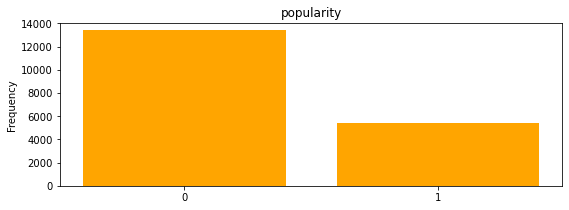

popularity:
0    13386
1     5449
Name: popularity, dtype: int64


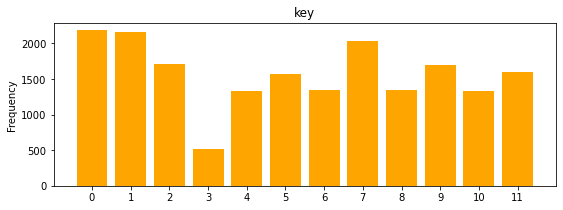

key:
0     2182
1     2164
7     2032
2     1715
9     1698
11    1600
5     1574
6     1351
8     1349
10    1331
4     1327
3      512
Name: key, dtype: int64


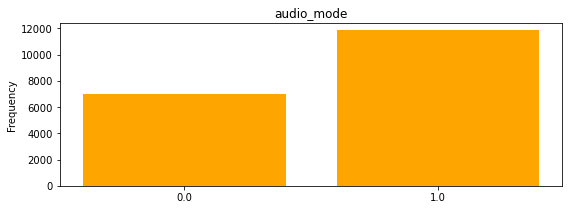

audio_mode:
1.0    11831
0.0     7004
Name: audio_mode, dtype: int64


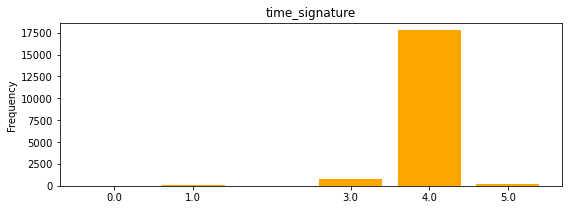

time_signature:
4.0    17754
3.0      772
5.0      233
1.0       73
0.0        3
Name: time_signature, dtype: int64


In [20]:
category1 = ["popularity","key","audio_mode","time_signature"]
for c in category1:
    bar_plot(c)

## Basic Data Analysis

In [90]:
# key vs popularity
song_data[["key","popularity"]].groupby(["key"], as_index = False).mean().sort_values(by="popularity",ascending = False)

,key,popularity
1,1,0.356285
6,6,0.321984
0,0,0.303850
5,5,0.300508
11,11,0.293750
8,8,0.292068
4,4,0.284853
10,10,0.280992
2,2,0.265889
9,9,0.253828


In [91]:
# audio_mode vs popularity
song_data[["audio_mode","popularity"]].groupby(["audio_mode"], as_index = False).mean().sort_values(by="popularity",ascending = False)

,audio_mode,popularity
0,0.0,0.296545
1,1.0,0.285014


In [92]:
# time_signature vs popularity
song_data[["time_signature","popularity"]].groupby(["time_signature"], as_index = False).mean().sort_values(by="popularity",ascending = False)

,time_signature,popularity
4,5.0,0.304721
3,4.0,0.292497
2,3.0,0.222798
1,1.0,0.178082
0,0.0,0.000000


In [93]:
from collections import Counter
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index #filtre
        # store indeces
        outlier_indices.extend(outlier_list_col) #The extend() extends the list by adding all items of a list (passed as an argument) to the end.
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2) 
    
    return multiple_outliers

In [26]:
song_data.loc[detect_outliers(song_data,["song_popularity","song_duration_ms","danceability","energy","instrumentalness","liveness","loudness","speechiness","audio_valence"])]

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,popularity
232,La Maza,58,351400.0,0.6520,0.555,0.331,0.000012,9,0.235,-17.718,0.0,0.2700,170.603,3.0,0.437,0
253,Whole Lotta Love,77,333893.0,0.0484,0.412,0.902,0.131000,9,0.405,-11.600,1.0,0.4050,89.740,4.0,0.422,1
501,Do You Feel Like We Do,48,836666.0,0.0439,0.295,0.568,0.011700,0,0.977,-8.232,1.0,0.0284,98.284,4.0,0.384,0
981,The Times They Are A-Changin' - Live at Sony M...,49,348560.0,0.6300,0.393,0.416,0.007910,9,0.986,-13.243,1.0,0.0401,163.604,3.0,0.512,0
1113,November Rain,38,537506.0,0.0165,0.197,0.629,0.279000,11,0.125,-9.291,1.0,0.0300,79.495,4.0,0.221,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15247,I Know You So Well,8,102661.0,0.9230,0.679,0.311,0.721000,0,0.813,-16.557,0.0,0.1050,60.724,4.0,0.304,0
16642,same stars,46,116918.0,0.2510,0.687,0.284,0.862000,0,0.496,-19.504,1.0,0.0378,115.996,4.0,0.159,0
17723,Dutch Spring,0,205623.0,0.1960,0.510,0.843,0.135000,6,0.569,-4.958,0.0,0.3910,83.355,4.0,0.832,0
3720,Racism And Injustice,21,260160.0,0.9220,0.650,0.316,0.000000,9,0.739,-18.244,0.0,0.9400,117.198,4.0,0.306,0


In [94]:
# drop outliers
song_data = song_data.drop(detect_outliers(song_data,["song_popularity","song_duration_ms","danceability","energy","instrumentalness","liveness","loudness","speechiness","audio_valence"]),axis = 0).reset_index(drop = True)

In [95]:
song_data[song_data["audio_mode"].isnull()]

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,popularity


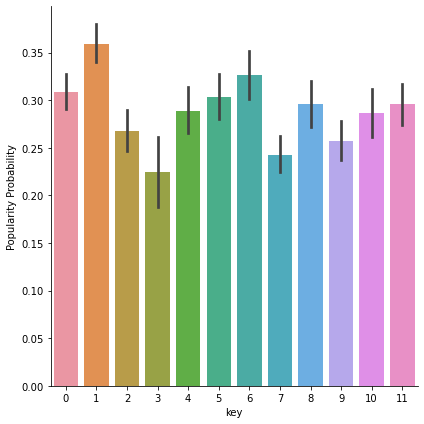

In [96]:
g = sns.factorplot(x = "key", y = "popularity", data = song_data, kind = "bar", size = 6)
g.set_ylabels("Popularity Probability")
plt.show()

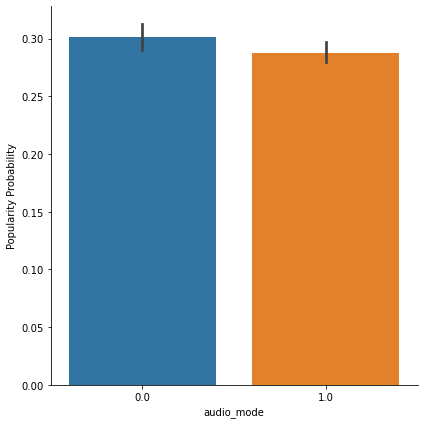

In [21]:
g = sns.factorplot(x = "audio_mode", y = "popularity", data = song_data, kind = "bar", size = 6)
g.set_ylabels("Popularity Probability")
plt.show()

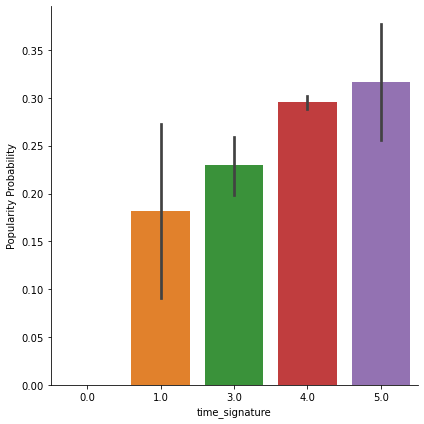

In [97]:
g = sns.factorplot(x = "time_signature", y = "popularity", data = song_data, kind = "bar", size = 6)
g.set_ylabels("Popularity Probability")
plt.show()

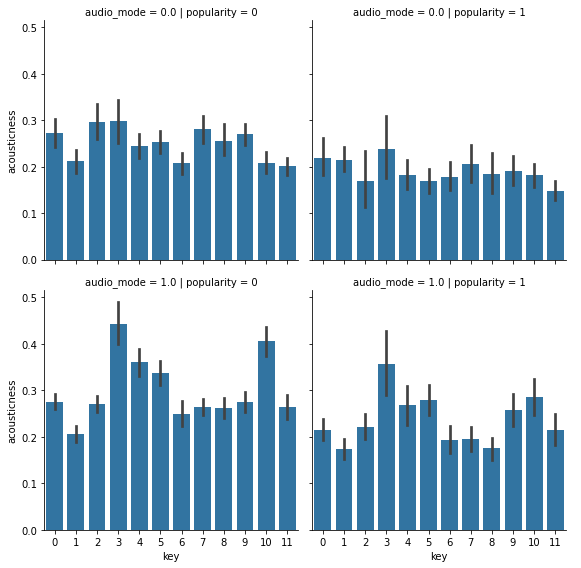

In [98]:
g = sns.FacetGrid(song_data, row = "audio_mode", col = "popularity", size = 4)
g.map(sns.barplot, "key", "acousticness")
g.add_legend()
plt.show()

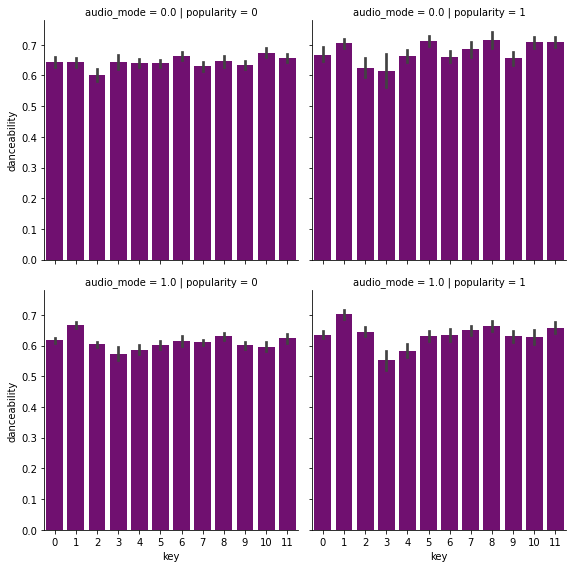

In [99]:
g = sns.FacetGrid(song_data, row = "audio_mode", col = "popularity", size = 4)
g.map(sns.barplot, "key", "danceability",color="purple")
g.add_legend()
plt.show()

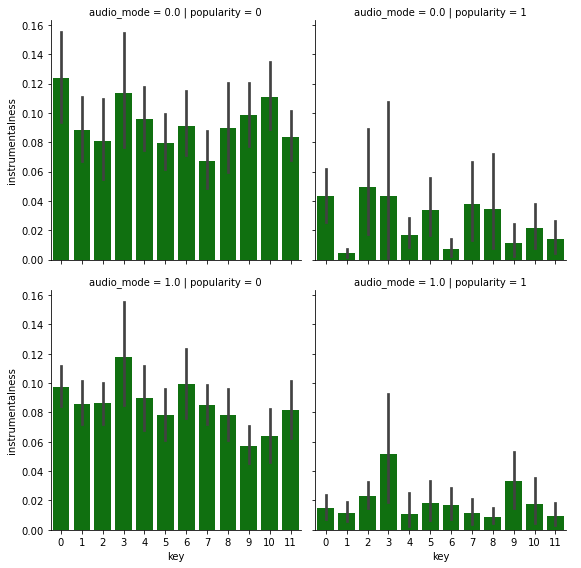

In [23]:
g = sns.FacetGrid(song_data, row = "audio_mode", col = "popularity", size = 4)
g.map(sns.barplot, "key", "instrumentalness",color="green")
g.add_legend()
plt.show()

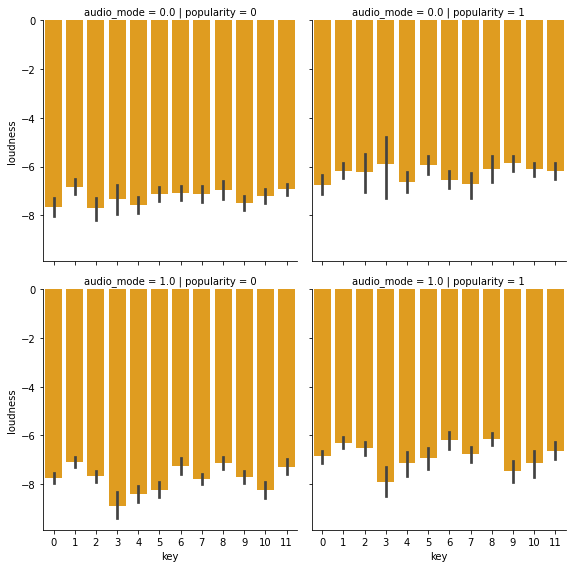

In [100]:
g = sns.FacetGrid(song_data, row = "audio_mode", col = "popularity", size = 4)
g.map(sns.barplot, "key", "loudness",color="orange")
g.add_legend()
plt.show()

> ## Features Distribution


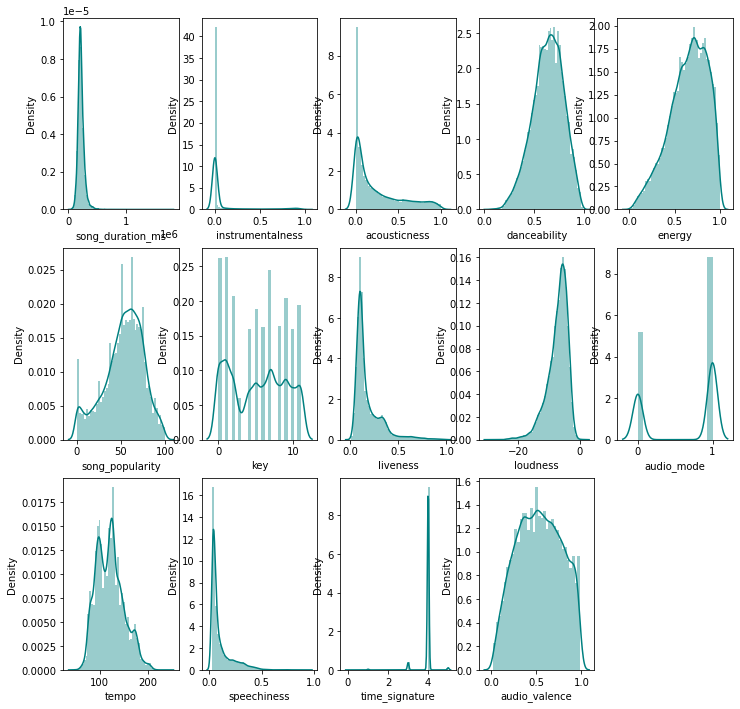

In [103]:
f, axes = plt.subplots(3, 5, figsize=(12, 12))
sns.distplot( song_data["song_duration_ms"] , color="teal", ax=axes[0, 0])
sns.distplot( song_data["instrumentalness"] , color="teal", ax=axes[0, 1])
sns.distplot( song_data["acousticness"] , color="teal", ax=axes[0, 2])
sns.distplot( song_data["danceability"] , color="teal", ax=axes[0, 3])
sns.distplot( song_data["energy"] , color="teal", ax=axes[0, 4])
sns.distplot( song_data["song_popularity"] , color="teal", ax=axes[1, 0])
sns.distplot( song_data["key"] , color="teal", ax=axes[1, 1])
sns.distplot( song_data["liveness"] , color="teal", ax=axes[1, 2])
sns.distplot( song_data["loudness"] , color="teal", ax=axes[1, 3])
sns.distplot( song_data["audio_mode"] , color="teal", ax=axes[1, 4])
sns.distplot( song_data["tempo"] , color="teal", ax=axes[2, 0])
sns.distplot( song_data["speechiness"] , color="teal", ax=axes[2, 1])
sns.distplot( song_data["time_signature"] , color="teal", ax=axes[2, 2])
sns.distplot( song_data["audio_valence"] , color="teal", ax=axes[2, 3])
f.delaxes(axes[2][4])
plt.show()

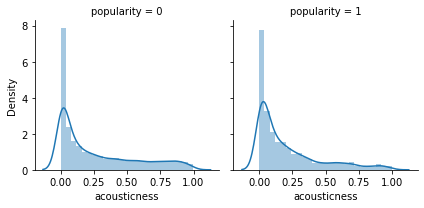

In [104]:
g = sns.FacetGrid(song_data, col = "popularity")
g.map(sns.distplot, "acousticness", bins = 25)
plt.show()

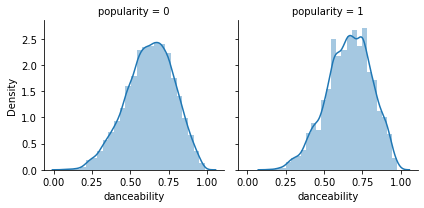

In [105]:
g = sns.FacetGrid(song_data, col = "popularity")
g.map(sns.distplot, "danceability", bins = 25)
plt.show()

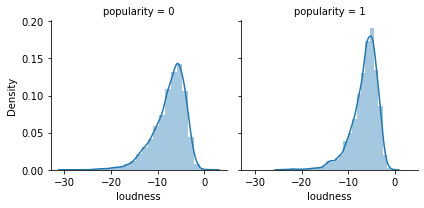

In [106]:
g = sns.FacetGrid(song_data, col = "popularity")
g.map(sns.distplot, "loudness", bins = 25)
plt.show()

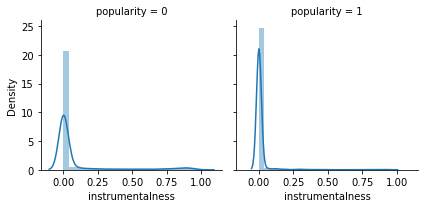

In [107]:
g = sns.FacetGrid(song_data, col = "popularity")
g.map(sns.distplot, "instrumentalness", bins = 25)
plt.show()

- Data distribution of songs display today's songs features like dancebility, energy, loudness and tempo are quite high. People like fast and loud music.
- According to instrumentalness, liveness and speechness, most of the songs are not live performances and they have lyrics.
- Keys like 0,1,5,6 and 11 seems more effective in songs. And if key== 0 or 1 or 6 song has more chance to be populer.
- Time_signure is mostly 4 and 5 in both populer and general data.
- If danceability>0.6 song has more chance to be popular.
- If loudness > -10 song has more chance to be popular.


> ## People like Happy Songs or Sad Songs?
- As we see in the feature explanations, audio valance describes the musical positiveness conveyed by a track (like sad or happiness - between 0 to 1). We supposed our threshold is 0.5.
- With this threshold we have happy songs more in the general data and the numbers are pretty close in the popular songs, but when we looked at top 500, we can say that negative songs are twice as much as positives.

**All Songs**

In [108]:
song_data3=song_data.copy()
song_data3["song_audio_valence"]= [ "Happy" if i>=0.5 else "Sad" for i in song_data.audio_valence ]
song_data3["song_audio_valence"].value_counts()

Happy    10047
Sad       8463
Name: song_audio_valence, dtype: int64

**Populer Songs**

In [109]:
song_data1=song_data3[song_data3["song_popularity"]>66.5]
song_data1["song_audio_valence"]= [ "Happy" if i>=0.5 else "Sad" for i in song_data1.audio_valence ]
song_data1["song_audio_valence"].value_counts()

Happy    2845
Sad      2574
Name: song_audio_valence, dtype: int64

**Top 500**

In [110]:
song_data2_new=song_data1[song_data1["song_popularity"]>90]
song_data2_new["song_audio_valence"]= [ "Happy" if i>=0.5 else "Sad" for i in song_data2_new.audio_valence ]
song_data2_new["song_audio_valence"].value_counts()

Sad      332
Happy    167
Name: song_audio_valence, dtype: int64

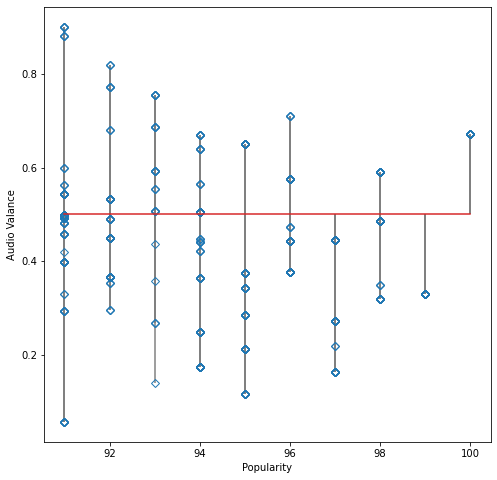

In [44]:
song_data2= song_data2_new[song_data2_new.popularity==1]
a=song_data2.iloc[:,1]
a.to_numpy()
b=song_data2.iloc[:,14]
b.to_numpy()
plt.figure(figsize=[8,8])
markerline, stemlines, baseline = plt.stem(
    a, b, linefmt='grey', markerfmt='D', bottom=0.5)
markerline.set_markerfacecolor('none')
plt.xlabel("Popularity")
plt.ylabel("Audio Valance")
plt.show()

In [111]:
new_data = pd.concat([song_info, song_data1],axis=1)
new_data=new_data[new_data["song_popularity"]>90]

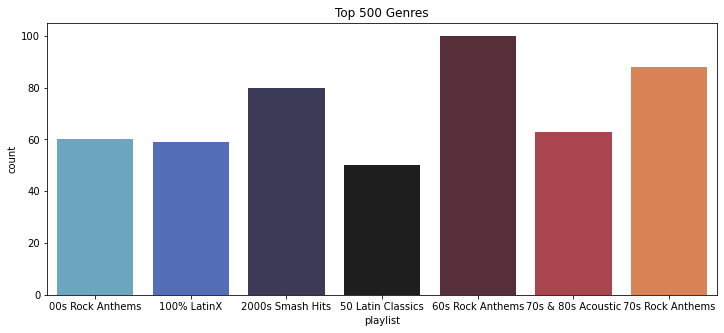

In [112]:
# Top 500 Playlists Gender
plt.figure(figsize=(12,5))
new_data= song_info['playlist'].head(500)
g = sns.countplot(new_data, palette="icefire")
plt.title("Top 500 Genres")
plt.show()

- 60's and 70's rock music seems more popular in this data.

 <a id="3c"></a> 
## Feature Engineering

In [113]:
spotify_song_data["popularity"]= [ 1 if i>=66.5 else 0 for i in spotify_song_data.song_popularity ]
spotify_song_data["popularity"].value_counts()

0    13386
1     5449
Name: popularity, dtype: int64

In [114]:
data_plr = pd.concat([spotify_song_data.popularity,spotify_song_data.song_name],axis=1)
data_plr.head()

,popularity,song_name
0,1,Boulevard of Broken Dreams
1,0,In The End
2,1,Seven Nation Army
3,1,By The Way
4,0,How You Remind Me


In [115]:
song_data['song_name'].value_counts(dropna=False)
song_data['song_name'].dropna(inplace=True)

In [121]:
df=pd.DataFrame(Song_Name_list,columns=['Names'])

In [122]:
artist= song_info.artist_name.tolist()
name_count = Counter(artist)         
most_common_names2 = name_count.most_common(10) 
most_common_names2


[('Kanye West', 82),
 ('Lady Gaga', 78),
 ('Drake', 68),
 ('Khalid', 61),
 ('Eminem', 47),
 ('6ix9ine', 45),
 ('David Guetta', 45),
 ('Calvin Harris', 40),
 ('The Chainsmokers', 40),
 ('Lil Wayne', 39)]

In [124]:
data_plr.head()

,popularity,song_name
0,1,Boulevard of Broken Dreams
1,0,In The End
2,1,Seven Nation Army
3,1,By The Way
4,0,How You Remind Me


In [128]:
song_data["key"] = song_data["key"].astype("category")
song_data = pd.get_dummies(song_data, columns=["key"])
song_data.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,audio_mode,...,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11
0,Boulevard of Broken Dreams,73,262333.0,0.005520,0.496,0.682,0.000029,0.0589,-4.095,1.0,...,0,0,0,0,0,0,1,0,0,0
1,In The End,66,216933.0,0.010300,0.542,0.853,0.000000,0.1080,-6.407,0.0,...,0,1,0,0,0,0,0,0,0,0
2,Seven Nation Army,76,231733.0,0.008170,0.737,0.463,0.447000,0.2550,-7.828,1.0,...,0,0,0,0,0,0,0,0,0,0
3,By The Way,74,216933.0,0.026400,0.451,0.970,0.003550,0.1020,-4.938,1.0,...,0,0,0,0,0,0,0,0,0,0
4,How You Remind Me,56,223826.0,0.000954,0.447,0.766,0.000000,0.1130,-5.065,1.0,...,0,0,0,0,0,0,0,0,1,0


In [129]:
song_data["audio_mode"] = song_data["audio_mode"].astype("category")
song_data = pd.get_dummies(song_data, columns=["audio_mode"])
song_data.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,...,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,audio_mode_0.0,audio_mode_1.0
0,Boulevard of Broken Dreams,73,262333.0,0.005520,0.496,0.682,0.000029,0.0589,-4.095,0.0294,...,0,0,0,0,1,0,0,0,0,1
1,In The End,66,216933.0,0.010300,0.542,0.853,0.000000,0.1080,-6.407,0.0498,...,0,0,0,0,0,0,0,0,1,0
2,Seven Nation Army,76,231733.0,0.008170,0.737,0.463,0.447000,0.2550,-7.828,0.0792,...,0,0,0,0,0,0,0,0,0,1
3,By The Way,74,216933.0,0.026400,0.451,0.970,0.003550,0.1020,-4.938,0.1070,...,0,0,0,0,0,0,0,0,0,1
4,How You Remind Me,56,223826.0,0.000954,0.447,0.766,0.000000,0.1130,-5.065,0.0313,...,0,0,0,0,0,0,1,0,0,1


In [130]:
song_data["time_signature"] = song_data["time_signature"].astype("category")
song_data = pd.get_dummies(song_data, columns=["time_signature"])
song_data.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,...,key_9,key_10,key_11,audio_mode_0.0,audio_mode_1.0,time_signature_0.0,time_signature_1.0,time_signature_3.0,time_signature_4.0,time_signature_5.0
0,Boulevard of Broken Dreams,73,262333.0,0.005520,0.496,0.682,0.000029,0.0589,-4.095,0.0294,...,0,0,0,0,1,0,0,0,1,0
1,In The End,66,216933.0,0.010300,0.542,0.853,0.000000,0.1080,-6.407,0.0498,...,0,0,0,1,0,0,0,0,1,0
2,Seven Nation Army,76,231733.0,0.008170,0.737,0.463,0.447000,0.2550,-7.828,0.0792,...,0,0,0,0,1,0,0,0,1,0
3,By The Way,74,216933.0,0.026400,0.451,0.970,0.003550,0.1020,-4.938,0.1070,...,0,0,0,0,1,0,0,0,1,0
4,How You Remind Me,56,223826.0,0.000954,0.447,0.766,0.000000,0.1130,-5.065,0.0313,...,0,1,0,0,1,0,0,0,1,0


<a id="4a"></a> <br>
## Models

In [131]:
song_data.drop(["song_popularity","song_name"],axis=1,inplace=True)

In [132]:
song_data.columns[song_data.isnull().any()]

Index([], dtype='object')

In [133]:
#fill nan values
song_data['song_duration_ms'] = song_data['song_duration_ms'].fillna(np.mean(song_data['song_duration_ms']))
song_data['acousticness'] = song_data['acousticness'].fillna(np.mean(song_data['acousticness']))
song_data['danceability'] = song_data['danceability'].fillna(np.mean(song_data['danceability']))
song_data['energy'] = song_data['energy'].fillna(np.mean(song_data['energy']))
song_data['instrumentalness'] = song_data['instrumentalness'].fillna(np.mean(song_data['instrumentalness']))
song_data['liveness'] = song_data['liveness'].fillna(np.mean(song_data['liveness']))
song_data['loudness'] = song_data['loudness'].fillna(np.mean(song_data['loudness']))
song_data['speechiness'] = song_data['speechiness'].fillna(np.mean(song_data['speechiness']))
song_data['tempo'] = song_data['tempo'].fillna(np.mean(song_data['tempo']))
song_data['audio_valence'] = song_data['audio_valence'].fillna(np.mean(song_data['audio_valence']))
song_data['popularity'] = song_data['popularity'].fillna(np.mean(song_data['popularity']))

In [134]:
song_data.columns[song_data.isnull().any()]

Index([], dtype='object')

In [135]:
def change_type(var):
    song_data[var] = song_data[var].astype(int)

In [136]:
#data preparation
y = song_data["popularity"].values
x_data=song_data.drop(["popularity"],axis=1)
#normalization
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data)).values#train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=42)
x_train = x_train.T
x_test = x_test.T
y_train = y_train.astype(int).T
y_test = y_test.astype(int).T
print("x_train: ",x_train.shape)
print("x_test: ",x_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

x_train:  (29, 14808)
x_test:  (29, 3702)
y_train:  (14808,)
y_test:  (3702,)


<a id="6"></a> <br>
**KNN Algorithm**

In [146]:
# KNN prediction
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
x,y = song_data.loc[:,song_data.columns != 'popularity'], song_data.loc[:,'popularity']
y=y.astype(int)
knn.fit(x,y)
prediction = knn.predict(x)
print('Prediction: {}'.format(prediction))

Prediction: [1 0 0 ... 0 0 0]


In [147]:
#KNN Test
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print('With KNN (K=3) train accuracy is: ',knn.score(x_train,y_train))
print('With KNN (K=3) test accuracy is: ',knn.score(x_test,y_test))

With KNN (K=3) train accuracy is:  0.993989735278228
With KNN (K=3) test accuracy is:  0.7947055645596974


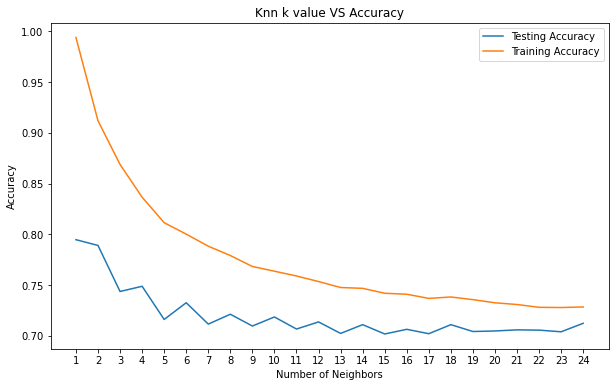

Best accuracy is 0.7947055645596974 with K = 1


In [163]:
neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []

for i, k in enumerate(neig):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    train_accuracy.append(knn.score(x_train, y_train))
    test_accuracy.append(knn.score(x_test, y_test))

plt.figure(figsize=[10,6])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('Knn k value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

In [164]:
from sklearn.model_selection import cross_val_score
k = 10
cv_result = cross_val_score(knn,x_train,y_train,cv=k)  
cv_result_knn=np.sum(cv_result)/k
print('Cross_val Scores: ',cv_result)
print('Cross_val scores average: ',np.sum(cv_result)/k)

Cross_val Scores:  [0.70965564 0.7049291  0.71100608 0.7116813  0.70762998 0.69345037
 0.7116813  0.71573261 0.70540541 0.70878378]
Cross_val scores average:  0.7079955563260761


In [165]:
from sklearn.model_selection import GridSearchCV
grid = {'n_neighbors': np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, grid, cv=3) 
knn_cv.fit(x,y)
print("Tuned hyperparameter k: {}".format(knn_cv.best_params_)) 
print("Best accuracy: {}".format(knn_cv.best_score_))

Tuned hyperparameter k: {'n_neighbors': 2}
Best accuracy: 0.773257698541329


In [166]:
KKN_Score= max(test_accuracy)
CrossVal_KKN_Score=cv_result_knn

<a id="7"></a> <br>
**SVM**

- SVM is an effective and simple method mostly used in classification problems. The aim of the SVM algorithm is to find a hyperplane in an N-dimensional space (N — the number of features) that distinctly classifies the data points. C and Gamma are the parameters for a nonlinear support vector machine (SVM) with a Gaussian radial basis function kernel.

In [167]:
from sklearn.svm import SVC
svm= SVC(random_state=1)  #kernel='rbf'
svm.fit(x_train,y_train)
print("Train accuracy of svm algo:",svm.score(x_train,y_train))
print("Test accuracy of svm algo:",svm.score(x_test,y_test))

Train accuracy of svm algo: 0.7071853052404106
Test accuracy of svm algo: 0.7074554294975689


In [168]:
from sklearn.model_selection import cross_val_score
k = 10
cv_result = cross_val_score(svm,x_train,y_train,cv=k) 
cv_result_svm= np.sum(cv_result)/k
print('Cross_val Scores: ',cv_result)
print('Cross_val scores average: ',np.sum(cv_result)/k)

Cross_val Scores:  [0.70695476 0.70695476 0.70695476 0.70695476 0.70695476 0.70695476
 0.70762998 0.70762998 0.70743243 0.70743243]
Cross_val scores average:  0.7071853386134278


In [169]:
SVM_score= svm.score(x_test,y_test)
CrossVal_SVM_score=cv_result_svm

In [170]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

steps = [('scalar', StandardScaler()),
         ('SVM', SVC())]
pipeline = Pipeline(steps)
parameters = {'SVM__C':[1, 10, 100],
              'SVM__gamma':[0.1, 0.01]}
cv = GridSearchCV(pipeline,param_grid=parameters,cv=10)
cv.fit(x_train,y_train)
y_pred = cv.predict(x_test)

print("Tuned Model Parameters: {}".format(cv.best_params_))
print("Test accuracy: {}".format(cv.score(x_test, y_test)))

Tuned Model Parameters: {'SVM__C': 100, 'SVM__gamma': 0.1}
Test accuracy: 0.7909238249594813


<a id="9"></a> <br>
**Decision Tree Classifier**

In [171]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,confusion_matrix,f1_score
from sklearn.tree import DecisionTreeClassifier

dt= DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
DecisionTree_score=dt.score(x_test,y_test)
print("Train ccuracy of decision tree:",dt.score(x_train,y_train))
print("Test accuracy of decision tree:",dt.score(x_test,y_test))

Train ccuracy of decision tree: 0.9953403565640194
Test accuracy of decision tree: 0.8060507833603457


In [172]:
from sklearn.model_selection import cross_val_score
k =10
cv_result = cross_val_score(dt,x_train,y_train,cv=k) # uses R^2 as score 
print('Cross_val Scores: ',cv_result)
print('Cross_val scores average: ',np.sum(cv_result)/k)

Cross_val Scores:  [0.80081026 0.78528022 0.80081026 0.79068197 0.79270763 0.7812289
 0.77852802 0.78257934 0.78716216 0.78783784]
Cross_val scores average:  0.7887626603646185


<a id="12"></a> <br>
## Comparison Of Performance

In [189]:
model_performances=pd.DataFrame({'Model':['K-NearestNeighbors','DesicionTreeClassifier','SVM'],
                                 'Accuracy':[SVM_score,DecisionTree_score,KKN_Score]})
model_performances.sort_values(by = "Accuracy",ascending=False)

,Model,Accuracy
1,DesicionTreeClassifier,0.806051
2,SVM,0.794706
0,K-NearestNeighbors,0.707455


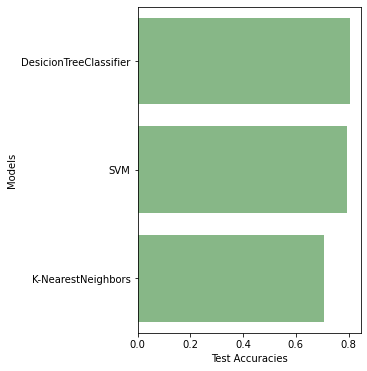

In [187]:
model_list= list(model_performances['Model'].unique())
accuracy_list= list(model_performances['Accuracy'].sort_values(ascending=False))
f,ax = plt.subplots(figsize = (4,6))
sns.barplot(x=accuracy_list,y=model_list,color='green',alpha = 0.5)
ax.set(xlabel='Test Accuracies', ylabel='Models')
plt.show()


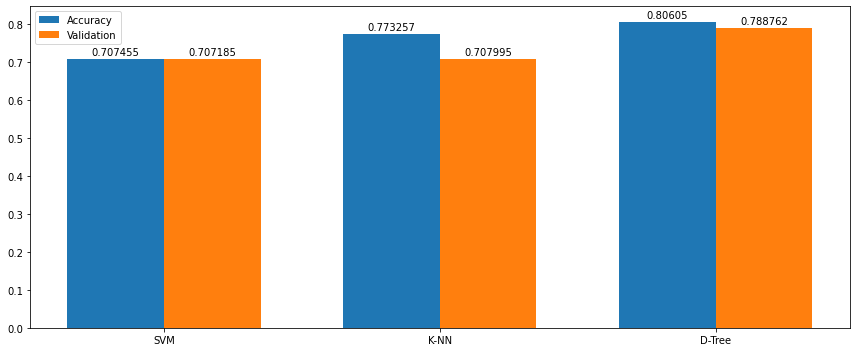

In [192]:
labels = ['SVM', 'K-NN','D-Tree']
accuracy = [0.707455,0.773257,0.806050]
validation = [0.707185, 0.707995,0.788762]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 5))
rects1 = ax.bar(x - width/2,accuracy, width, label='Accuracy')
rects2 = ax.bar(x + width/2, validation, width, label='Validation')

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 2),
                    textcoords="offset points",
                    ha='center', va='bottom')
        
autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.show()

In [196]:
spotify_song_data_train,spotify_song_data_test, spotify_song_info_train, spotify_song_info_test = train_test_split(spotify_song_data,spotify_song_info, train_size=0.7, random_state=369)

<a id="13"></a> <br>
## Conclusion

First we tried to predict popular songs using audio features then we added song name texts’ polarity to it and tried to improve our model. We also fitted the model using each importance as a threshold. Although accusticness is the most important of these features did not lead us to a strong result.  
We had 18835 songs available. Decision Tree algorithms which mainly given better results when we don’t have so much data got the best result with svm. There were no strong linear correlations in our data, so linear methods did not fit well. In LR, We built the model using the gradient decent and this gave the best result in 200 iterations which was a moderate result. As in many popularity studies, we achieved the second best result with SVM. Adding Polarity to features value has almost not changed the result at all. So, our best model will be SVM if we have larger amount of data

